In [1]:
import numpy as np
import torch
#torch 출력 옵션주는 메소드
torch.set_printoptions(edgeitems=2, threshold=50)

In [2]:
torch.ones(51)

tensor([1., 1.,  ..., 1., 1.])

In [3]:
import imageio
#imageio로 이미지 읽어오기
img_arr = imageio.imread('../data/p1ch4/image-dog/bobby.jpg')
img_arr.shape

(720, 1280, 3)

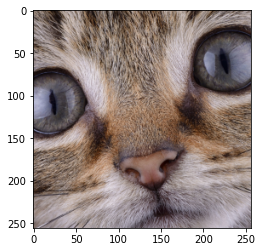

In [18]:
#이미지 확인
from matplotlib import pyplot as plt

plt.imshow(img_arr)

In [5]:
# VNC로 이미지 확인
import cv2

VNC_img = cv2.imread('../data/p1ch4/image-dog/bobby.jpg')
cv2.imshow('img', VNC_img)
cv2.waitKey(-1)

113

In [6]:
img = torch.from_numpy(img_arr)
out = img.permute(2, 0, 1)
print(out.size())

torch.Size([3, 720, 1280])


In [7]:
batch_size = 3
batch = torch.zeros(batch_size, 3, 256, 256, dtype=torch.uint8)

In [8]:
import os

data_dir = '../data/p1ch4/image-cats/'
filenames = [name for name in os.listdir(data_dir) if os.path.splitext(name)[-1] == '.png']
print(filenames)

['cat2.png', 'cat3.png', 'cat1.png']


In [9]:
# list comprehension 예제
temp = ['idx_{}'.format(i) for i in range(100) if i%2 == 0]
print(temp)

['idx_0', 'idx_2', 'idx_4', 'idx_6', 'idx_8', 'idx_10', 'idx_12', 'idx_14', 'idx_16', 'idx_18', 'idx_20', 'idx_22', 'idx_24', 'idx_26', 'idx_28', 'idx_30', 'idx_32', 'idx_34', 'idx_36', 'idx_38', 'idx_40', 'idx_42', 'idx_44', 'idx_46', 'idx_48', 'idx_50', 'idx_52', 'idx_54', 'idx_56', 'idx_58', 'idx_60', 'idx_62', 'idx_64', 'idx_66', 'idx_68', 'idx_70', 'idx_72', 'idx_74', 'idx_76', 'idx_78', 'idx_80', 'idx_82', 'idx_84', 'idx_86', 'idx_88', 'idx_90', 'idx_92', 'idx_94', 'idx_96', 'idx_98']


In [10]:
import os

data_dir = '../data/p1ch4/image-cats/'
filenames = [name for name in os.listdir(data_dir) if os.path.splitext(name)[-1] == '.png']
for i, filename in enumerate(filenames):
    img_arr = imageio.imread(os.path.join(data_dir, filename))
    img_t = torch.from_numpy(img_arr)
    img_t = img_t.permute(2, 0, 1)
    img_t = img_t[:3] # 이 clipping은 PNG 파일처럼 투명도에 대한 채널이 있는 경우 이를 버리기 위해서 사용
    batch[i] = img_t

In [11]:
batch = batch.float() # 데이터 타입 캐스팅
batch /= 255.0 # 가장 단순한 normalization

In [12]:
# 단순 255 나누기 정규화 결과
print(batch.max())
print(batch.min())

tensor(1.)
tensor(0.)


In [13]:
# 채널별로 정규화 한다. 여기선 batch 단위로 정규화하지만 학습데이터 전부에서 정규화하는 것이 좋다.
n_channels = batch.shape[1]
for c in range(n_channels):
    mean = torch.mean(batch[:, c])
    std = torch.std(batch[:, c])
    batch[:, c] = (batch[:, c] - mean) / std

In [14]:
# 채널별 정규화 결과
# Red
print('===R===')
print(batch[:,0].max())
print(batch[:,0].min())
# Green
print('===G===')
print(batch[:,1].max())
print(batch[:,1].min())
# Blue
print('===B===')
print(batch[:,2].max())
print(batch[:,2].min())


===R===
tensor(1.8992)
tensor(-2.6220)
===G===
tensor(2.6444)
tensor(-2.1731)
===B===
tensor(3.0946)
tensor(-1.8409)
